In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train_filepath = "../input/instagram-fake-spammer-genuine-accounts/train.csv"
test_filepath = "../input/instagram-fake-spammer-genuine-accounts/test.csv"
insta_train = pd.read_csv(train_filepath)
insta_test = pd.read_csv(test_filepath)

In [3]:
insta_train.head()

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
0,1,0.27,0,0.0,0,53,0,0,32,1000,955,0
1,1,0.00,2,0.0,0,44,0,0,286,2740,533,0
2,1,0.10,2,0.0,0,0,0,1,13,159,98,0
3,1,0.00,1,0.0,0,82,0,0,679,414,651,0
4,1,0.00,2,0.0,0,0,0,1,6,151,126,0


In [4]:
insta_train.describe()

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
count,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,5.760000e+02,576.000000,576.000000
mean,0.701389,0.163837,1.460069,0.036094,0.034722,22.623264,0.116319,0.381944,107.489583,8.530724e+04,508.381944,0.500000
std,0.458047,0.214096,1.052601,0.125121,0.183234,37.702987,0.320886,0.486285,402.034431,9.101485e+05,917.981239,0.500435
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000
25%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.900000e+01,57.500000,0.000000
50%,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,1.505000e+02,229.500000,0.500000
75%,1.000000,0.310000,2.000000,0.000000,0.000000,34.000000,0.000000,1.000000,81.500000,7.160000e+02,589.500000,1.000000
max,1.000000,0.920000,12.000000,1.000000,1.000000,150.000000,1.000000,1.000000,7389.000000,1.533854e+07,7500.000000,1.000000


In [5]:
insta_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576 entries, 0 to 575
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   profile pic           576 non-null    int64  
 1   nums/length username  576 non-null    float64
 2   fullname words        576 non-null    int64  
 3   nums/length fullname  576 non-null    float64
 4   name==username        576 non-null    int64  
 5   description length    576 non-null    int64  
 6   external URL          576 non-null    int64  
 7   private               576 non-null    int64  
 8   #posts                576 non-null    int64  
 9   #followers            576 non-null    int64  
 10  #follows              576 non-null    int64  
 11  fake                  576 non-null    int64  
dtypes: float64(2), int64(10)
memory usage: 54.1 KB


In [6]:
print(insta_train.shape)
print(insta_test.shape)

(576, 12)
(120, 12)


In [7]:
print(insta_train.isna().values.any().sum())
print(insta_train.isna().values.any().sum())


0
0


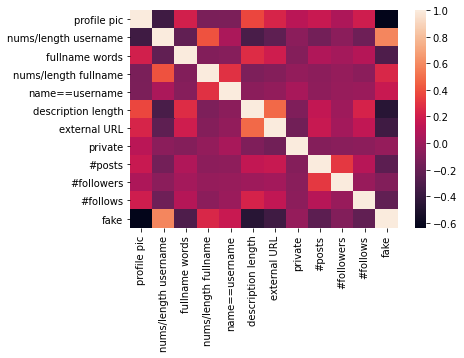

In [8]:
corr= insta_train.corr()
sns.heatmap(corr)

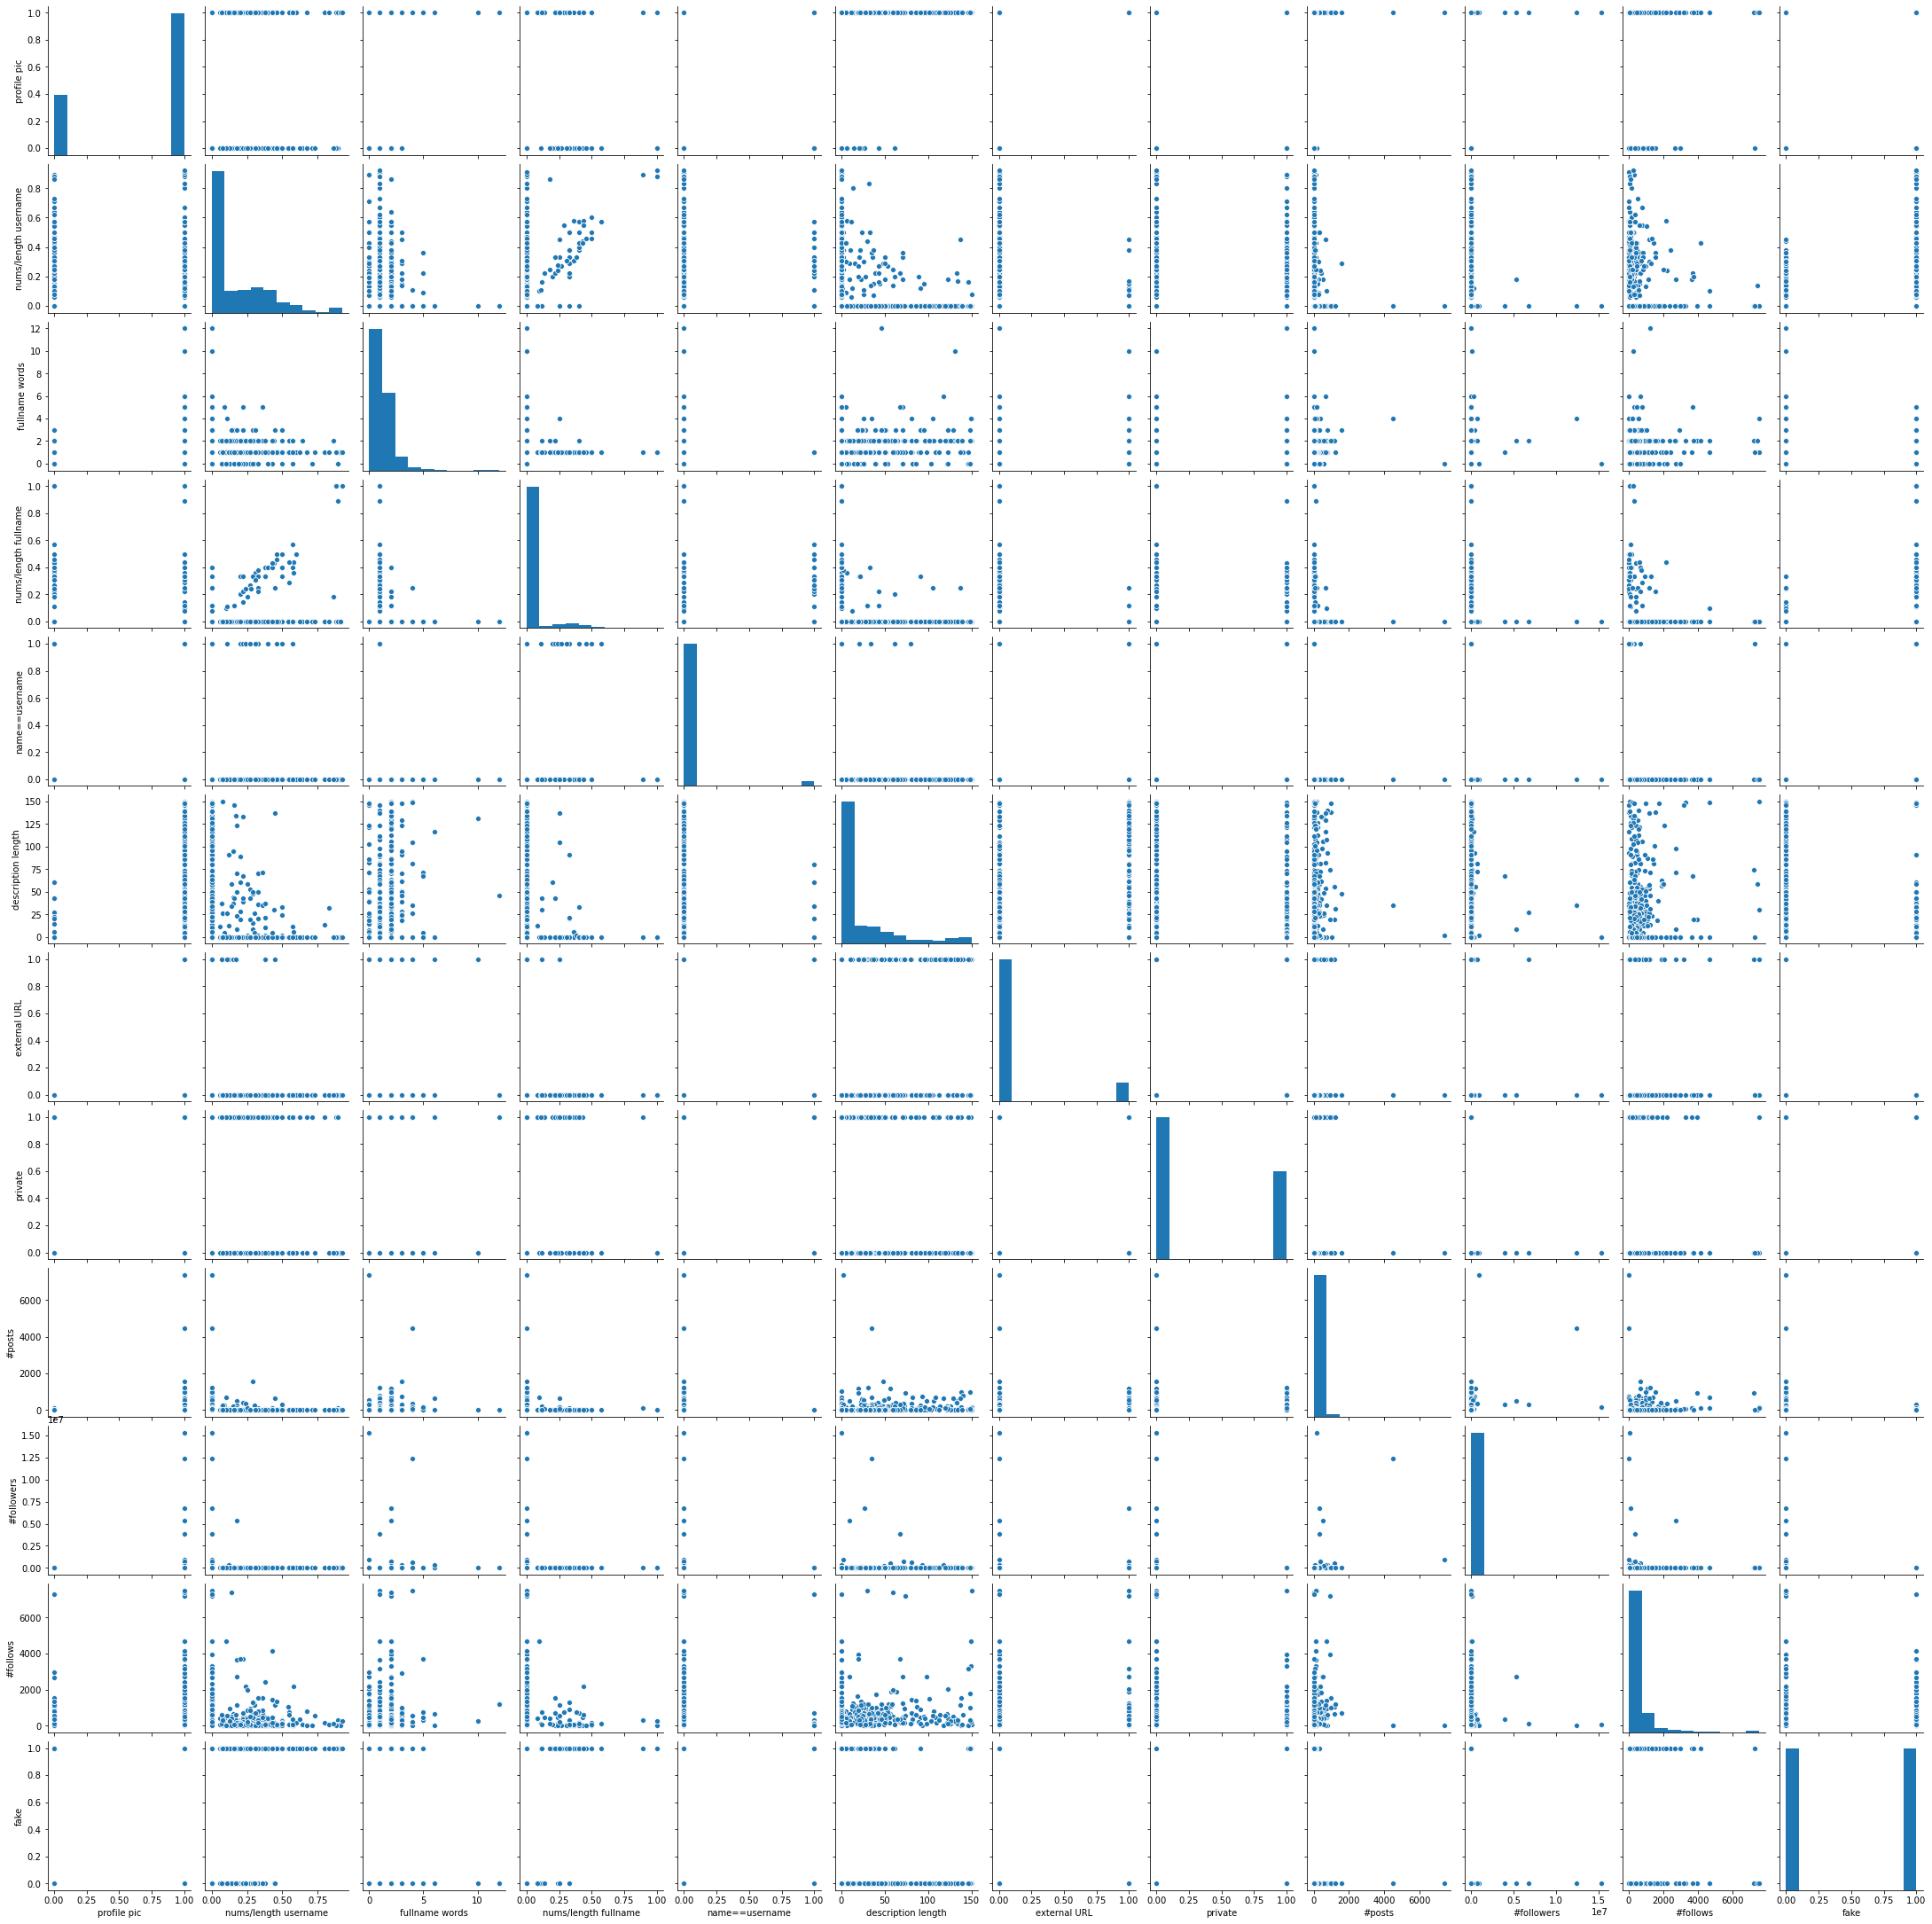

In [9]:
sns.pairplot(insta_train)

In [10]:
train_Y = insta_train.fake
train_Y = pd.DataFrame(train_Y)
train_Y.tail(12)

,fake
564,1
565,1
566,1
567,1
568,1
569,1
570,1
571,1
572,1
573,1


In [11]:
train_X = insta_train.drop(columns="fake")
train_X.head()

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows
0,1,0.27,0,0.0,0,53,0,0,32,1000,955
1,1,0.00,2,0.0,0,44,0,0,286,2740,533
2,1,0.10,2,0.0,0,0,0,1,13,159,98
3,1,0.00,1,0.0,0,82,0,0,679,414,651
4,1,0.00,2,0.0,0,0,0,1,6,151,126


In [12]:
test_Y = insta_test.fake
test_Y =pd.DataFrame(test_Y)
test_Y.tail(12)

,fake
108,1
109,1
110,1
111,1
112,1
113,1
114,1
115,1
116,1
117,1


In [13]:
test_X = insta_test.drop(columns="fake")
test_X.head()

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows
0,1,0.33,1,0.33,1,30,0,1,35,488,604
1,1,0.00,5,0.00,0,64,0,1,3,35,6
2,1,0.00,2,0.00,0,82,0,1,319,328,668
3,1,0.00,1,0.00,0,143,0,1,273,14890,7369
4,1,0.50,1,0.00,0,76,0,1,6,225,356


In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report


In [15]:
logreg = LogisticRegression()
model1 = logreg.fit(train_X,train_Y)
logreg_predict = model1.predict(test_X)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [16]:
accuracy_score(logreg_predict,test_Y)

0.9083333333333333

In [17]:
print(classification_report(logreg_predict,test_Y))

              precision    recall  f1-score   support

           0       0.87      0.95      0.90        55
           1       0.95      0.88      0.91        65

    accuracy                           0.91       120
   macro avg       0.91      0.91      0.91       120
weighted avg       0.91      0.91      0.91       120



In [18]:
def plot_confusion_matrix(test_Y,predict_y):
    C = confusion_matrix(test_Y,predict_y)
    A = (((C.T)/(C.sum(axis=1))).T)
    B = (C/C.sum(axis=0))
    plt.figure(figsize=(20,4))
    labels = [1,2]
    cmap=sns.light_palette("seagreen")
    plt.subplot(1,3,1)
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels,yticklabels=labels)
    plt.xlabel("Predicted Class")
    plt.ylabel("Original Class")
    plt.title("Confusion matrix")
    plt.subplot(1,3,2)
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels,yticklabels=labels)
    plt.xlabel("Predicted Class")
    plt.ylabel("Original Class")
    plt.title("Precision matrix")
    plt.subplot(1,3,3)
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels,yticklabels=labels)
    plt.xlabel("Predicted Class")
    plt.ylabel("Original Class")
    plt.title("Recall matrix")
    plt.show()
    
    
    

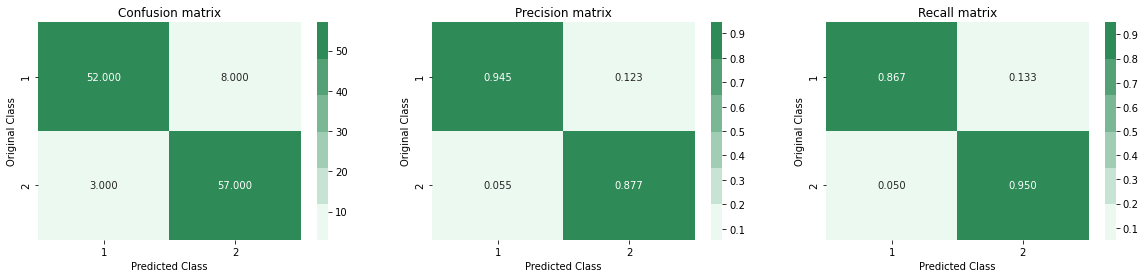

In [19]:
plot_confusion_matrix(test_Y,logreg_predict)

In [20]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
model2 = knn.fit(train_X,train_Y)
knn_predict = model2.predict(test_X)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [21]:
accuracy_score(knn_predict,test_Y)

0.8583333333333333

In [22]:
print(classification_report(knn_predict,test_Y))

              precision    recall  f1-score   support

           0       0.90      0.83      0.86        65
           1       0.82      0.89      0.85        55

    accuracy                           0.86       120
   macro avg       0.86      0.86      0.86       120
weighted avg       0.86      0.86      0.86       120



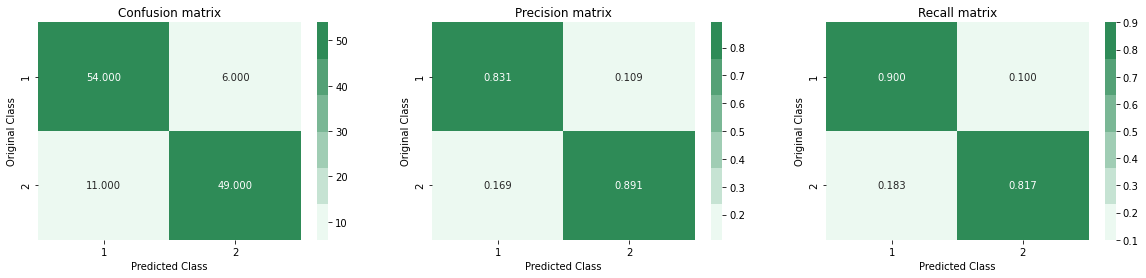

In [23]:
plot_confusion_matrix(test_Y,knn_predict)

In [24]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
model3= rfc.fit(train_X,train_Y)
rfc_predict = model3.predict(test_X)


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [25]:
accuracy_score(rfc_predict,test_Y)

0.9333333333333333

In [26]:
print(classification_report(rfc_predict,test_Y))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93        60
           1       0.93      0.93      0.93        60

    accuracy                           0.93       120
   macro avg       0.93      0.93      0.93       120
weighted avg       0.93      0.93      0.93       120



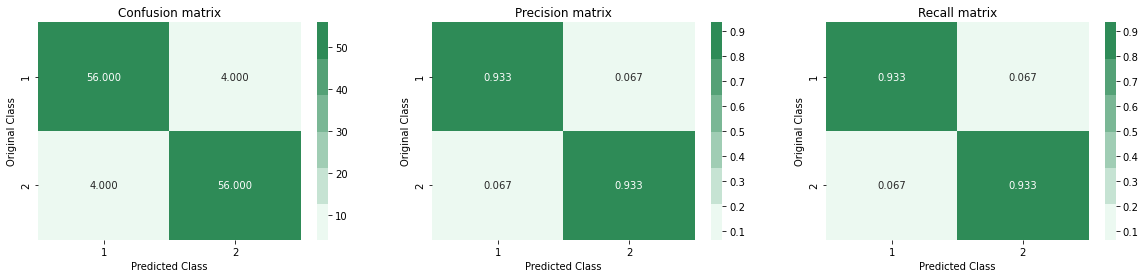

In [27]:
plot_confusion_matrix(test_Y,rfc_predict)

In [28]:
from xgboost import XGBClassifier
xgb= XGBClassifier()
model4 = xgb.fit(train_X,train_Y)
xgb_predict = model4.predict(test_X)

/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [29]:
accuracy_score(xgb_predict,test_Y)

0.95

In [30]:
print(classification_report(xgb_predict,test_Y))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95        58
           1       0.97      0.94      0.95        62

    accuracy                           0.95       120
   macro avg       0.95      0.95      0.95       120
weighted avg       0.95      0.95      0.95       120



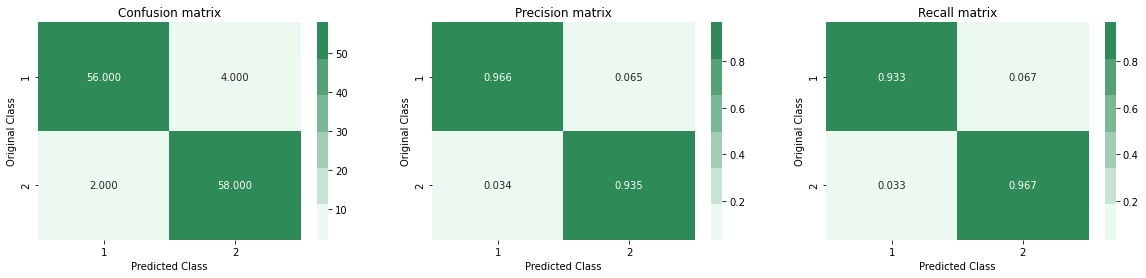

In [31]:
plot_confusion_matrix(test_Y,xgb_predict)

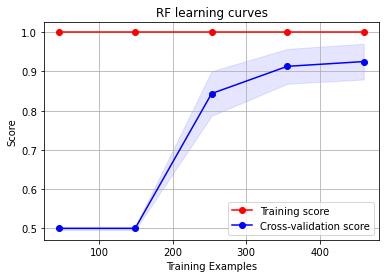

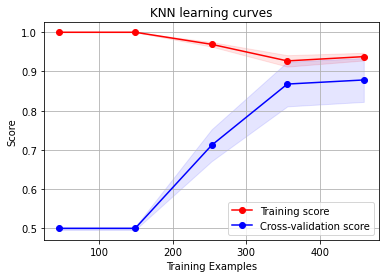

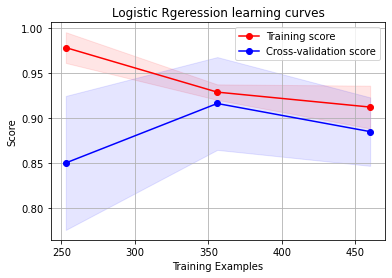

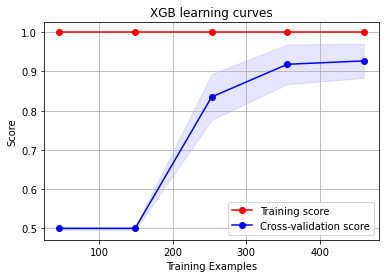

In [32]:
from sklearn.model_selection import learning_curve
def plot_learning_curve(estimator,title,X,y,ylim=None,cv=None,n_jobs=-1,train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training Examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="b")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="b",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

g = plot_learning_curve(model3,"RF learning curves",train_X,train_Y)
g = plot_learning_curve(model2,"KNN learning curves",train_X,train_Y)
g = plot_learning_curve(model1,"Logistic Rgeression learning curves",train_X,train_Y)
g = plot_learning_curve(model3,"XGB learning curves",train_X,train_Y)

In [33]:
print('Logistic Regression Accuracy:',accuracy_score(logreg_predict,test_Y))
print('KNN Accuracy:',accuracy_score(knn_predict,test_Y))
print('RFC Accuracy:',accuracy_score(rfc_predict,test_Y))
print('XGB Accuracy:',accuracy_score(xgb_predict,test_Y))

Logistic Regression Accuracy: 0.9083333333333333
KNN Accuracy: 0.8583333333333333
RFC Accuracy: 0.9333333333333333
XGB Accuracy: 0.95
